In [1]:
# pip install pandas_datareader
# !pip install tensorboard
#!pip install tensorflow

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_datareader as web
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(18,8))
plt.rc('lines', markersize=4)
plt.rc('font', size=18)
!rm -rf ./logs/
%load_ext tensorboard
%reload_ext tensorboard

from sklearn.datasets import fetch_openml
import tensorflow as tf
from tensorflow import keras

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!pip install yfinance

  Using cached yfinance-0.1.90-py2.py3-none-any.whl (29 kB)


In [209]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

In [211]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,247.449997,252.539993,247.169998,252.509995,30665100,0.0,0.0
2022-12-13 00:00:00-05:00,261.690002,263.920013,253.070007,256.920013,42196900,0.0,0.0
2022-12-14 00:00:00-05:00,257.130005,262.589996,254.309998,257.220001,35410900,0.0,0.0


In [212]:
import pandas as pd
df = pd.DataFrame(hist)
# df.to_csv(index_col = 0)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,247.449997,252.539993,247.169998,252.509995,30665100,0.0,0.0
2022-12-13 00:00:00-05:00,261.690002,263.920013,253.070007,256.920013,42196900,0.0,0.0
2022-12-14 00:00:00-05:00,257.130005,262.589996,254.309998,257.220001,35410900,0.0,0.0


In [213]:
df = df.rename_axis('Date').reset_index()

print(df)

                          Date        Open        High         Low  \
0    1986-03-13 00:00:00-05:00    0.055380    0.063524    0.055380   
1    1986-03-14 00:00:00-05:00    0.060809    0.064067    0.060809   
2    1986-03-17 00:00:00-05:00    0.062980    0.064609    0.062980   
3    1986-03-18 00:00:00-05:00    0.064067    0.064609    0.061894   
4    1986-03-19 00:00:00-05:00    0.062437    0.062980    0.060809   
...                        ...         ...         ...         ...   
9263 2022-12-12 00:00:00-05:00  247.449997  252.539993  247.169998   
9264 2022-12-13 00:00:00-05:00  261.690002  263.920013  253.070007   
9265 2022-12-14 00:00:00-05:00  257.130005  262.589996  254.309998   
9266 2022-12-15 00:00:00-05:00  253.720001  254.199997  247.339996   
9267 2022-12-16 00:00:00-05:00  248.550003  249.839996  243.509995   

           Close      Volume  Dividends  Stock Splits  
0       0.060809  1031788800        0.0           0.0  
1       0.062980   308160000        0.0        

In [214]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year
0,1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0,1986
1,1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0,1986
2,1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0,1986
3,1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0,1986
4,1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0,1986


In [215]:
from pathlib import Path  
filepath = Path('stockprice.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 

In [216]:
hist.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [217]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
year            0
dtype: int64

In [218]:
# df_mean = pd.DataFrame(df.isna().mean()*100)
# df_mean[1] = 100
# for index, row in df_mean.iterrows():
#     m_labels = ['Not-Nulls',"Nulls"]
#     nulls = row[0]
#     if nulls == 0.000:
#         continue
#     total = row[1]
#     y=[(total-nulls),nulls]
#     plt.pie(y, labels = m_labels,radius=1.5,explode = [0.2,0],textprops={'fontsize': 14},autopct='%1.3f%%',colors = ['#2cb3f2','#ecf22c'])
#     plt.title(index,fontdict={'fontsize':14})
#     plt.show()


In [219]:
hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9268.000000,9268.000000,9268.000000,9268.000000,9.268000e+03,9268.000000,9268.000000
mean,40.437643,40.865538,39.995492,40.445826,5.816016e+07,0.002649,0.001834
std,66.797358,67.488337,66.058129,66.806321,3.831599e+07,0.043924,0.059192
min,0.055380,0.057551,0.055380,0.056465,2.304000e+06,0.000000,0.000000
25%,3.179834,3.215260,3.133413,3.180445,3.393210e+07,0.000000,0.000000
50%,19.022206,19.212279,18.832619,19.014447,5.146270e+07,0.000000,0.000000
75%,31.273045,31.600125,30.833434,31.234715,7.196795e+07,0.000000,0.000000
max,341.420804,346.423942,339.023310,339.924835,1.031789e+09,3.080000,2.000000


In [220]:
hist.info

<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.055380    0.063524    0.055380    0.060809   
1986-03-14 00:00:00-05:00    0.060809    0.064067    0.060809    0.062980   
1986-03-17 00:00:00-05:00    0.062980    0.064609    0.062980    0.064067   
1986-03-18 00:00:00-05:00    0.064067    0.064609    0.061894    0.062437   
1986-03-19 00:00:00-05:00    0.062437    0.062980    0.060809    0.061351   
...                               ...         ...         ...         ...   
2022-12-12 00:00:00-05:00  247.449997  252.539993  247.169998  252.509995   
2022-12-13 00:00:00-05:00  261.690002  263.920013  253.070007  256.920013   
2022-12-14 00:00:00-05:00  257.130005  262.589996  254.309998  257.220001   
2022-12-15 00:00:00-05:00  253.720001  254.199997  247.339996  249.009995   
2022-12-16 00:00:00-05:00  248.550003  249.8

In [221]:
hist.drop_duplicates(keep=False)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,247.449997,252.539993,247.169998,252.509995,30665100,0.0,0.0
2022-12-13 00:00:00-05:00,261.690002,263.920013,253.070007,256.920013,42196900,0.0,0.0
2022-12-14 00:00:00-05:00,257.130005,262.589996,254.309998,257.220001,35410900,0.0,0.0


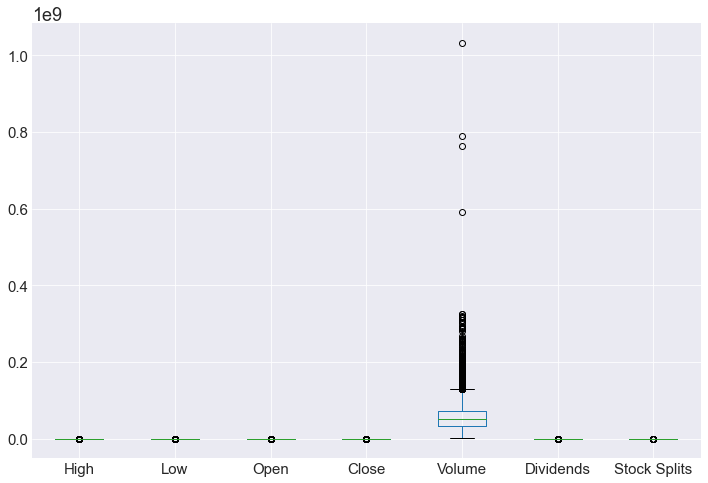

In [222]:
#Outlers detection 
df.boxplot(column = ['High','Low','Open','Close','Volume','Dividends','Stock Splits'],figsize=(12,8),fontsize=15)
plt.show()

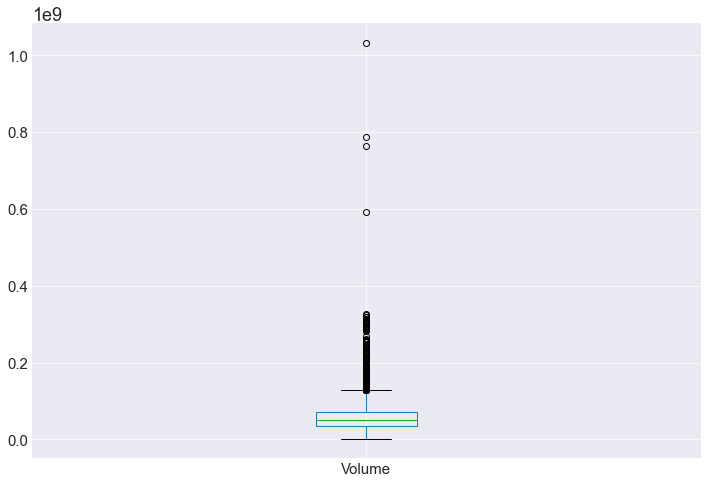

In [223]:
df.boxplot(column = ['Volume'],figsize=(12,8),fontsize=15)
plt.show()

In [224]:
print('99% - quantile value :',df['Volume'].quantile(0.99))
print('98% - quantile value :',df['Volume'].quantile(0.98))
print('97% - quantile value :',df['Volume'].quantile(0.97))
print('96% - quantile value :',df['Volume'].quantile(0.96))
print('95% - quantile value :',df['Volume'].quantile(0.95))

print('90% - quantile value :',df['Volume'].quantile(0.90))
print('85% - quantile value :',df['Volume'].quantile(0.85))
print('80% - quantile value :',df['Volume'].quantile(0.80))

print('75% - quantile value :',df['Volume'].quantile(0.75))
print('25% - quantile value :',df['Volume'].quantile(0.25))
print('10% - quantile value :',df['Volume'].quantile(0.10))
print('9% - quantile value :',df['Volume'].quantile(0.09))
print('5% - quantile value :',df['Volume'].quantile(0.05))

print('01% - quantile value :',df['Volume'].quantile(0.01))

99% - quantile value : 185807231.99999997
98% - quantile value : 155860496.0
97% - quantile value : 139462000.0
96% - quantile value : 128325807.99999997
95% - quantile value : 120387629.99999994
90% - quantile value : 97475220.00000001
85% - quantile value : 86215655.0
80% - quantile value : 78159080.0
75% - quantile value : 71967950.0
25% - quantile value : 33932100.0
10% - quantile value : 23206430.0
9% - quantile value : 22616906.0
5% - quantile value : 19187290.0
01% - quantile value : 12492520.0


<AxesSubplot:xlabel='Volume', ylabel='Density'>

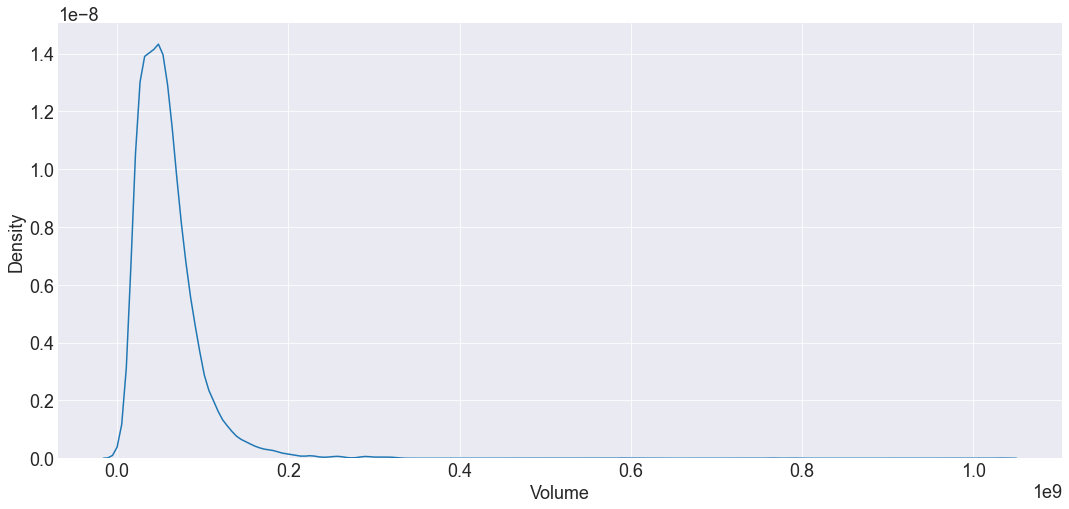

In [225]:
sns.distplot(a=df.Volume, hist=False)

<AxesSubplot:xlabel='Volume'>

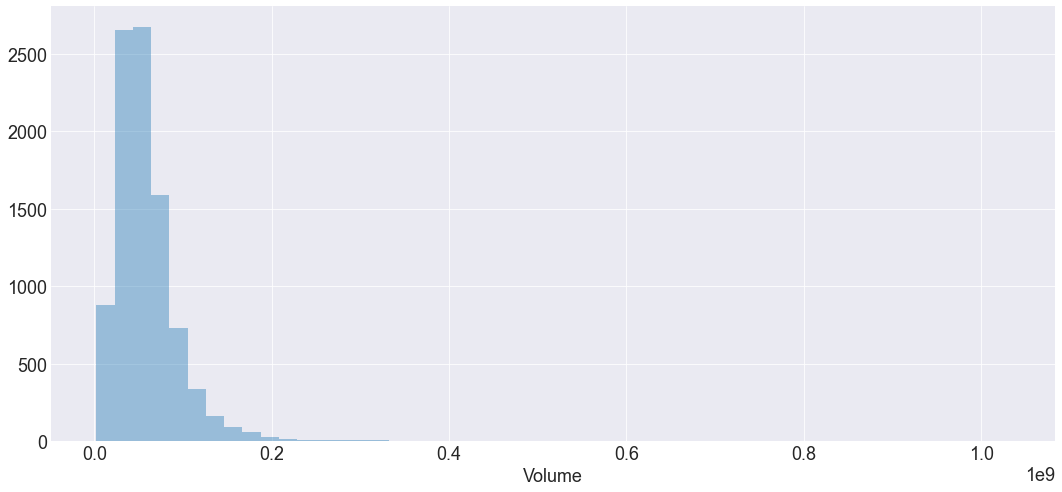

In [226]:
sns.distplot(a=df.Volume, kde= False)

In [227]:
# taknig floor as 1% and cap as 90% quantile values
cap = df['Volume'].quantile(0.90)
flr = df['Volume'].quantile(0.01)
df['Volume'] = np.where(df['Volume'] > cap, cap, df['Volume'])
df['Volume'] = np.where(df['Volume'] < flr, flr, df['Volume'])

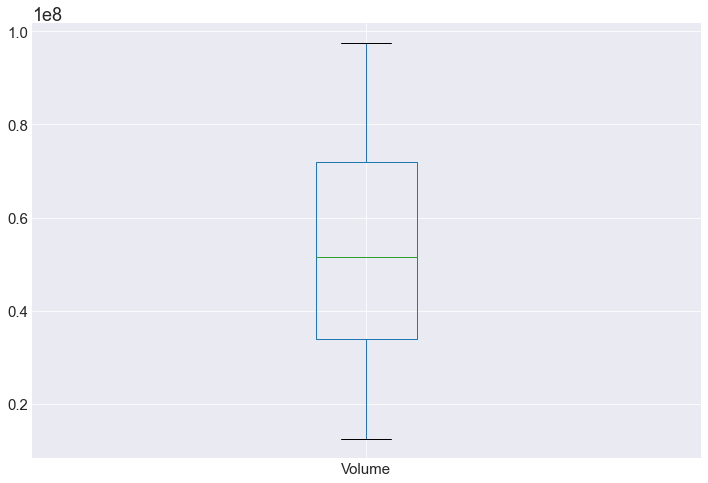

In [228]:
df.boxplot(column = ['Volume'],figsize=(12,8),fontsize=15)
plt.show()

<AxesSubplot:xlabel='Volume'>

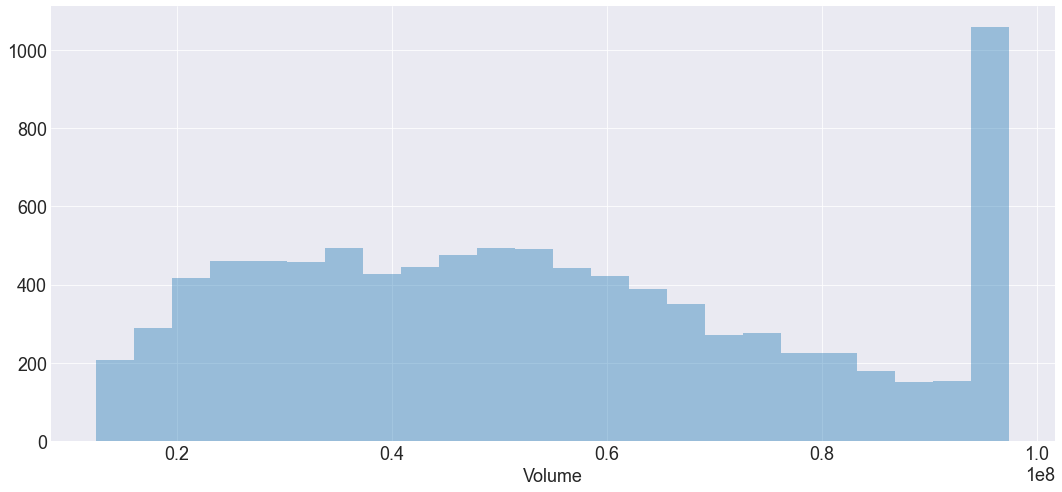

In [229]:
sns.distplot(a=df.Volume, kde= False)

<AxesSubplot:xlabel='Volume', ylabel='Density'>

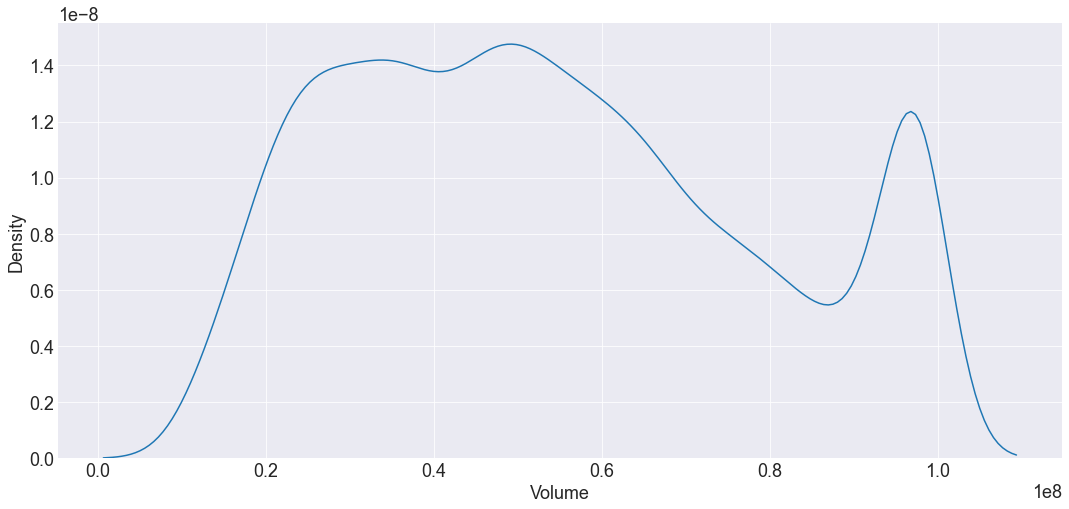

In [230]:
sns.distplot(a=df.Volume, hist=False)

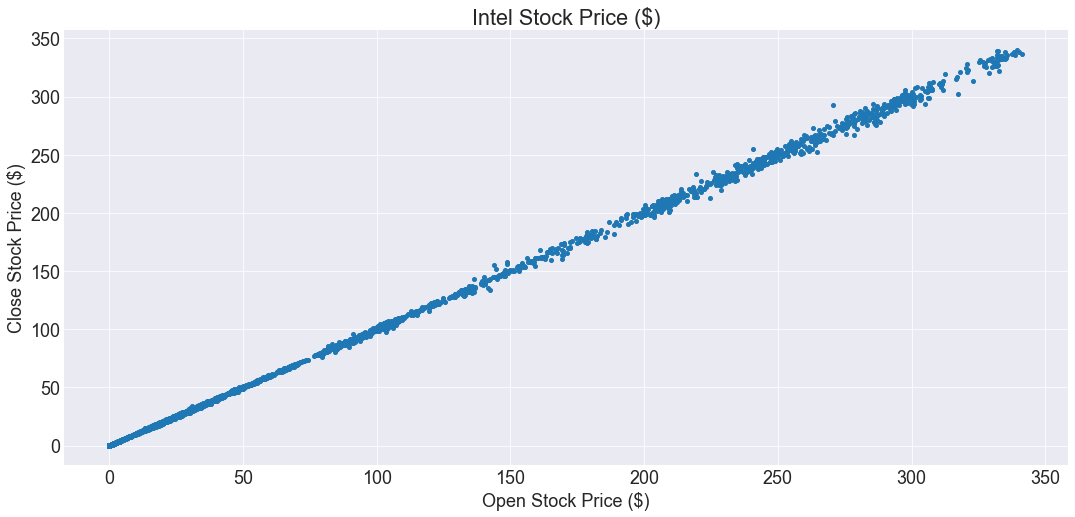

In [231]:
#plotting the scatter plot for open and close price 

#set the title of the graph
plt.title('Intel Stock Price ($)')

#set the x and y axis label 
plt.xlabel('Open Stock Price ($)')
plt.ylabel('Close Stock Price ($)')

#plot the scatter plot 
plt.scatter(hist['Open'],hist['Close'])
plt.show()

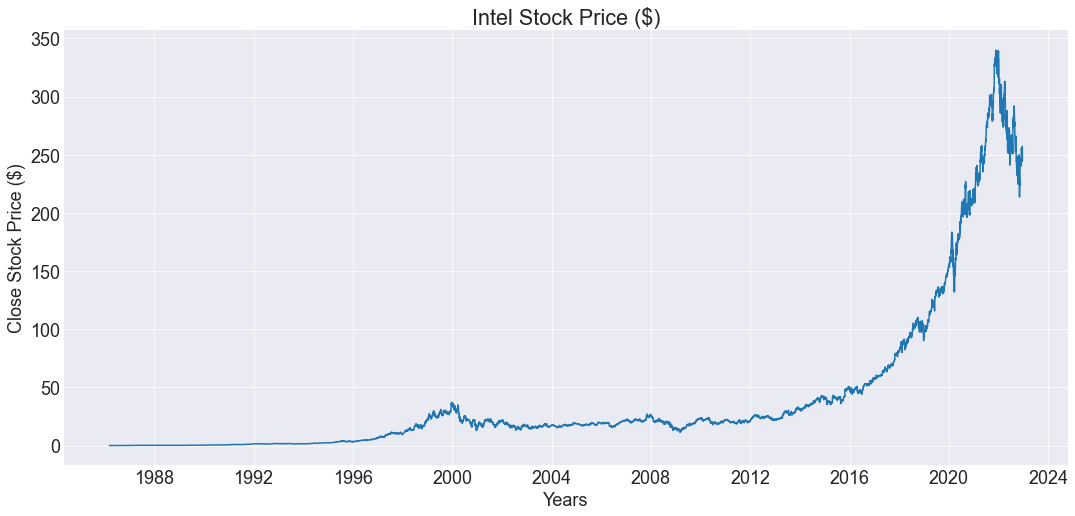

In [232]:
#plotting the scatter plot for the closing of price with respect to year 

plt.title('Intel Stock Price ($)')

plt.xlabel('Years')
plt.ylabel('Close Stock Price ($)')

plt.plot(hist['Close'])
plt.show()

In [233]:
#taking the first 5 closing price 

hist1 = hist[['Close']]
hist1.head()

,Close
Date,
1986-03-13 00:00:00-05:00,0.060809
1986-03-14 00:00:00-05:00,0.062980
1986-03-17 00:00:00-05:00,0.064067
1986-03-18 00:00:00-05:00,0.062437
1986-03-19 00:00:00-05:00,0.061351


In [234]:
pred_days = 50

In [235]:
hist1['prediction'] = hist1[['Close']].shift(-pred_days)
hist1

,Close,prediction
Date,,
1986-03-13 00:00:00-05:00,0.060809,0.067324
1986-03-14 00:00:00-05:00,0.062980,0.069496
1986-03-17 00:00:00-05:00,0.064067,0.071667
1986-03-18 00:00:00-05:00,0.062437,0.073296
1986-03-19 00:00:00-05:00,0.061351,0.076011
...,...,...
2022-12-12 00:00:00-05:00,252.509995,NaN
2022-12-13 00:00:00-05:00,256.920013,NaN
2022-12-14 00:00:00-05:00,257.220001,NaN


In [236]:
hist1.head(50)

,Close,prediction
Date,,
1986-03-13 00:00:00-05:00,0.060809,0.067324
1986-03-14 00:00:00-05:00,0.062980,0.069496
1986-03-17 00:00:00-05:00,0.064067,0.071667
1986-03-18 00:00:00-05:00,0.062437,0.073296
1986-03-19 00:00:00-05:00,0.061351,0.076011
1986-03-20 00:00:00-05:00,0.059723,0.073839
1986-03-21 00:00:00-05:00,0.058094,0.073839
1986-03-24 00:00:00-05:00,0.056465,0.073296
1986-03-25 00:00:00-05:00,0.057551,0.074382


In [237]:
x = np.array(hist1.drop(['prediction'], 1))[:-pred_days]
y =np.array(hist1['prediction'])[:-pred_days]
print(x)
print(y)

[[6.08085766e-02]
 [6.29801527e-02]
 [6.40665963e-02]
 ...
 [2.48180588e+02]
 [2.48499680e+02]
 [2.46096451e+02]]
[6.73240125e-02 6.94955736e-02 7.16671869e-02 ... 2.57220001e+02
 2.49009995e+02 2.44690002e+02]


# Implementing Linear regression and decision tree classfication

In [238]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25)

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [240]:
linear = LinearRegression().fit(x_train, y_train)


In [241]:
tree = DecisionTreeRegressor().fit(x_train,y_train)


In [242]:
x_future = hist1.drop(['prediction'], 1)[:-pred_days]
x_future = x_future.tail(pred_days)
x_future = np.array(x_future)
x_future

array([[275.04940796],
       [279.35809326],
       [276.64154053],
       [273.46722412],
       [281.07955933],
       [282.25375366],
       [281.51739502],
       [278.94015503],
       [280.91040039],
       [287.7366333 ],
       [285.60714722],
       [290.47311401],
       [292.02545166],
       [291.26916504],
       [290.50134277],
       [289.35455322],
       [285.34585571],
       [276.9694519 ],
       [275.66314697],
       [275.01498413],
       [278.06637573],
       [267.33660889],
       [264.48464966],
       [262.23098755],
       [260.73519897],
       [259.66821289],
       [255.34040833],
       [252.53829956],
       [257.36471558],
       [257.79348755],
       [263.71679688],
       [265.90063477],
       [251.28186035],
       [251.51119995],
       [244.69042969],
       [244.05223083],
       [243.83283997],
       [241.7686615 ],
       [238.27848816],
       [240.30278015],
       [237.25138855],
       [236.78269958],
       [235.74563599],
       [240

In [243]:
linear_prediction = linear.predict(x_future)
linear_prediction

array([279.90496522, 284.27906724, 281.52127038, 278.29875984,
       286.0266695 , 287.21869107, 286.47115264, 283.85478365,
       285.8549423 , 292.78481466, 290.6229976 , 295.56284205,
       297.1387481 , 296.37097914, 295.59149939, 294.42729868,
       290.35773903, 281.85416028, 280.52802234, 279.87001875,
       282.96773818, 272.07506639, 269.17980723, 266.89192884,
       265.37343042, 264.2902448 , 259.89673324, 257.05208139,
       261.95177458, 262.38705639, 268.4002965 , 270.61729056,
       255.77656626, 256.00938782, 249.08506105, 248.43717273,
       248.21445095, 246.11893305, 242.57577007, 244.63079592,
       241.5330765 , 241.05727165, 240.00446281, 244.72192628,
       241.10789446, 236.45116907, 244.38784361, 252.62820854,
       252.95214495, 250.51242912])

In [244]:
tree_prediction = tree.predict(x_future)
tree_prediction

array([233.58174133, 228.60575867, 224.77655029, 225.11558533,
       233.58174133, 291.57940674, 290.96627808, 237.82975769,
       235.81542969, 252.99847412, 241.4395752 , 246.55517578,
       264.59112549, 230.66993713, 226.11277771, 319.58532715,
       231.47766113, 227.52879333, 280.84973145, 213.64790344,
       259.36697388, 227.22962952, 228.2268219 , 223.8790741 ,
       236.83256531, 275.04940796, 240.8711853 , 241.29000854,
       241.72999573, 273.818573  , 241.22000122, 296.87991333,
       245.02999878, 247.58000183, 282.82012939, 241.75999451,
       240.33000183, 283.39263916, 254.69000244, 247.3999939 ,
       250.19999695, 245.41999817, 244.36999512, 247.3999939 ,
       245.41999817, 252.50999451, 256.92001343, 257.22000122,
       249.00999451, 257.51300049])

# Intel Stock Price Prediction Model(Linear Regression Model)

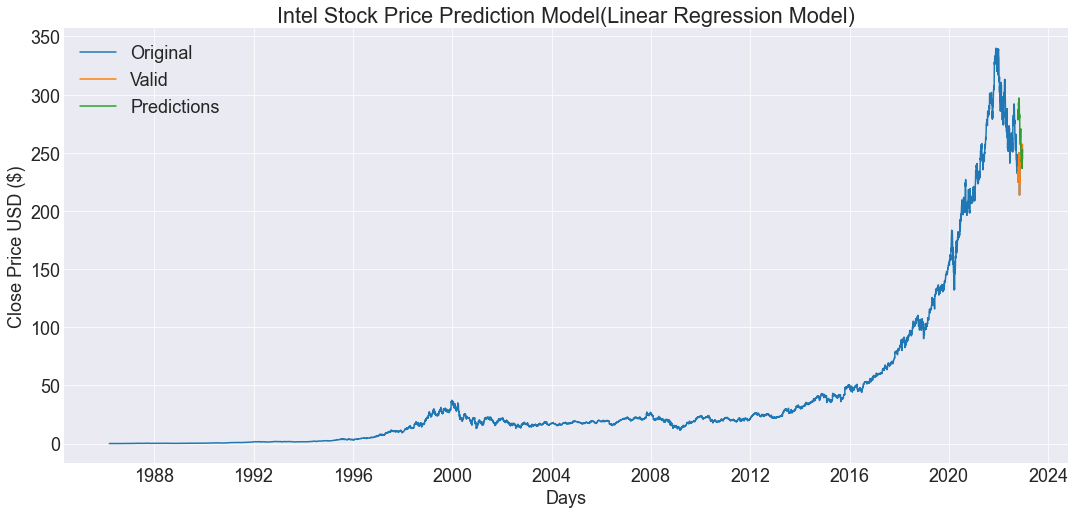

In [245]:
predictions = linear_prediction
valid = hist1[x.shape[0]:]
valid["Predictions"] = predictions
plt.title("Intel Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(hist1["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

# Intel Stock Price Prediction Model(Decision Tree Regressor Model)

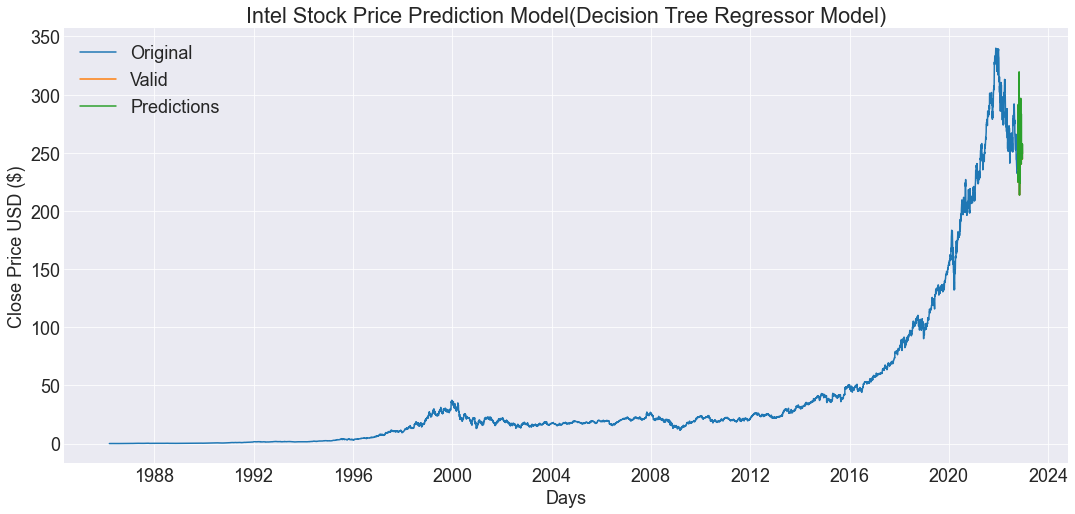

In [246]:
predictions = tree_prediction
valid = hist1[x.shape[0]:]
valid["Predictions"] = predictions
plt.title("Intel Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(hist1["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

# Plotting Linear Prediction for future days and close stock prediction 

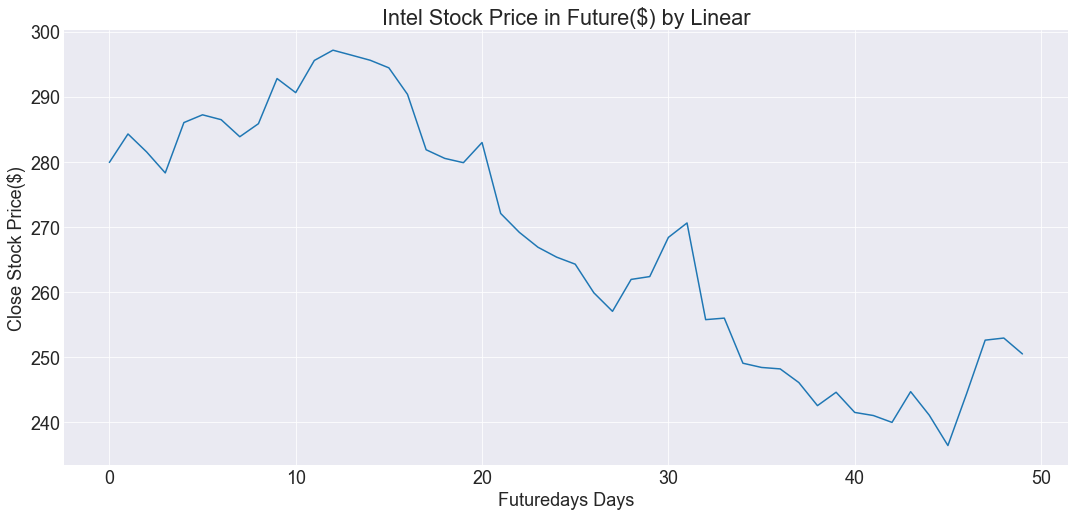

In [247]:
plt.title('Intel Stock Price in Future($) by Linear')
plt.xlabel('Futuredays Days')
plt.ylabel('Close Stock Price($)')
plt.plot(linear_prediction)

# Plotting decision tree prediction for future days and close stock prediction

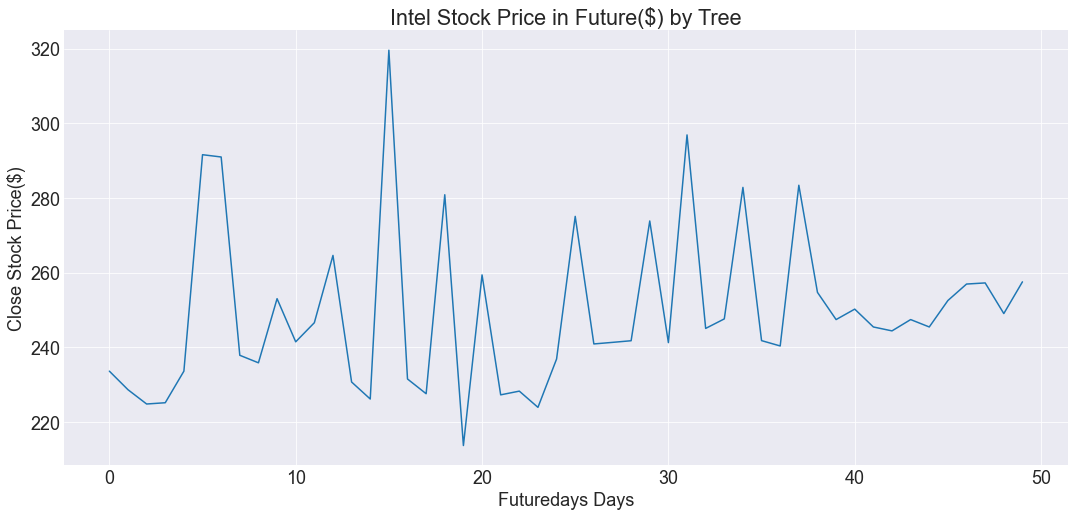

In [248]:
plt.title('Intel Stock Price in Future($) by Tree')
plt.xlabel('Futuredays Days')
plt.ylabel('Close Stock Price($)')
plt.plot(tree_prediction)

# Using Seaborn 

## Pair plot for  intel stock prediction and close stock price

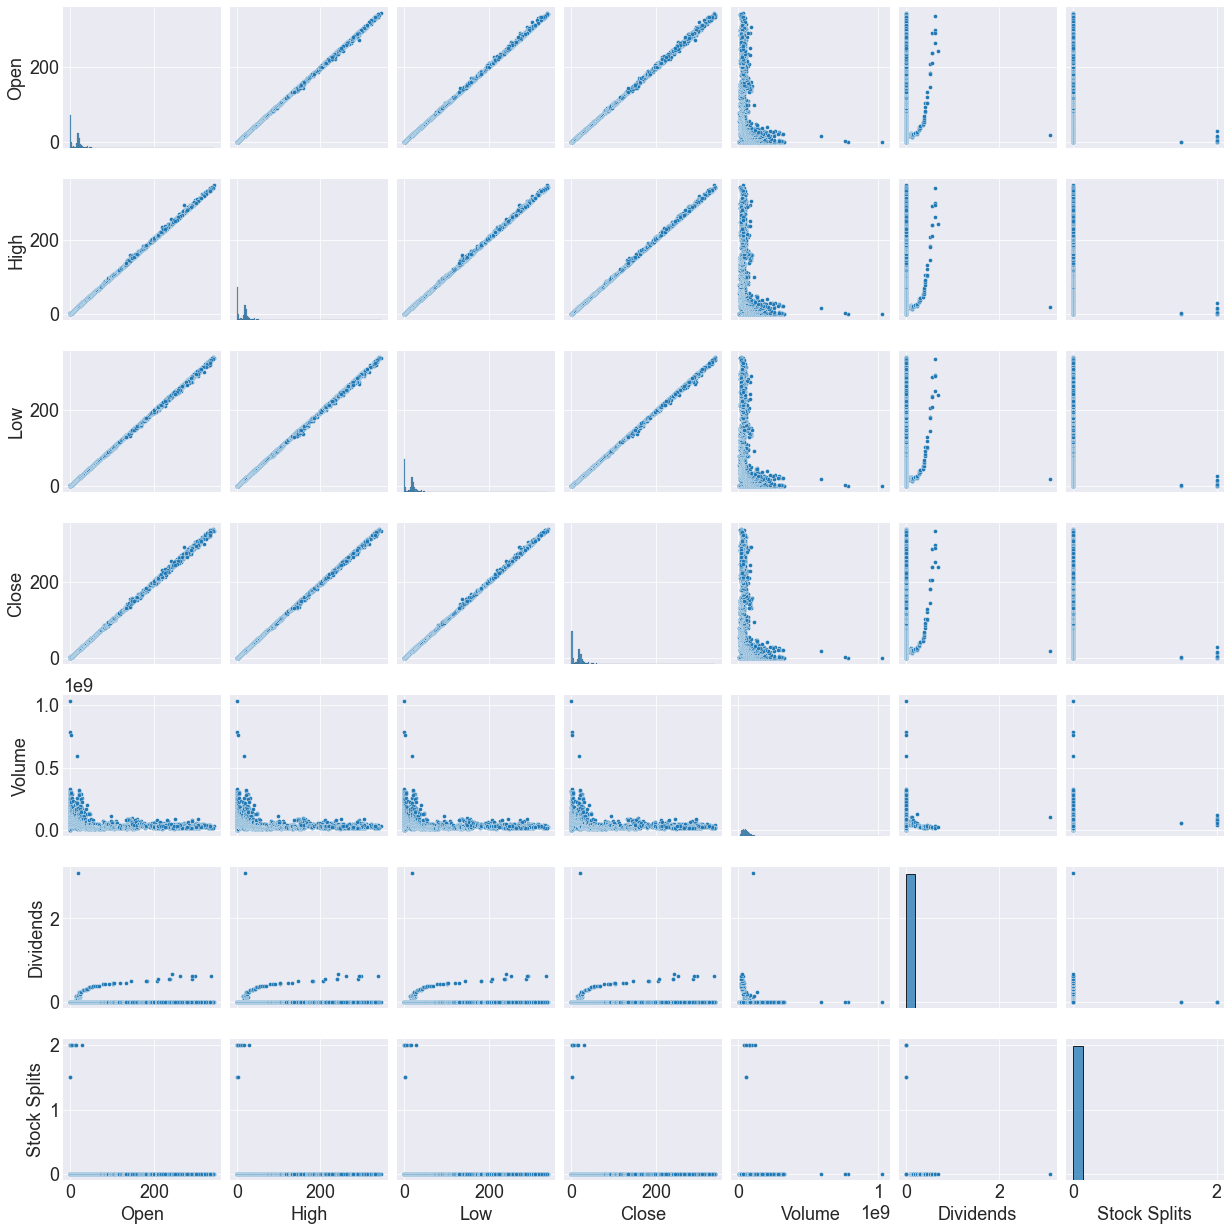

In [249]:
import seaborn as sns 
sns.pairplot(hist)

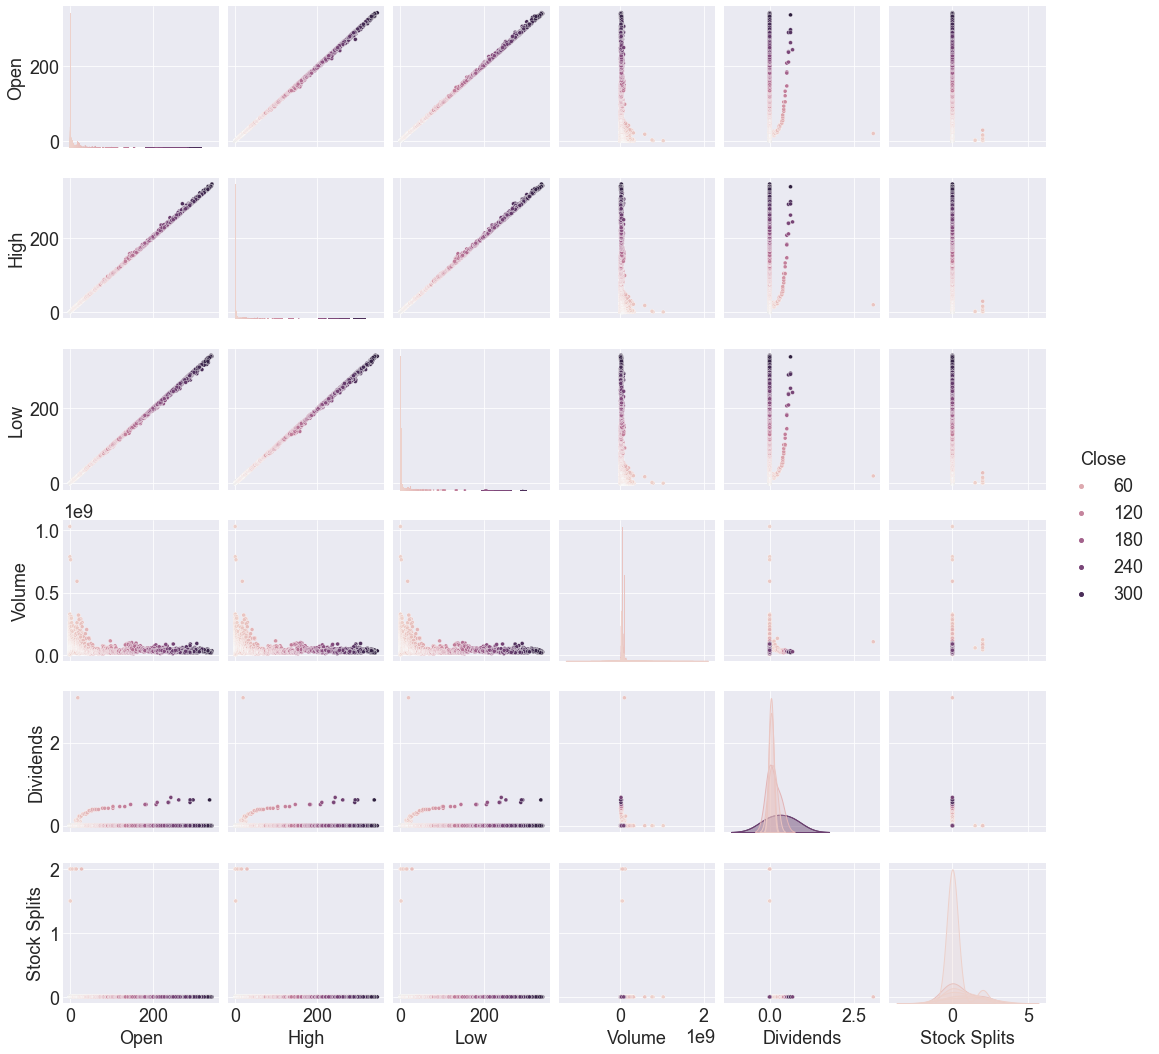

In [250]:
sns.pairplot(hist,hue="Close")

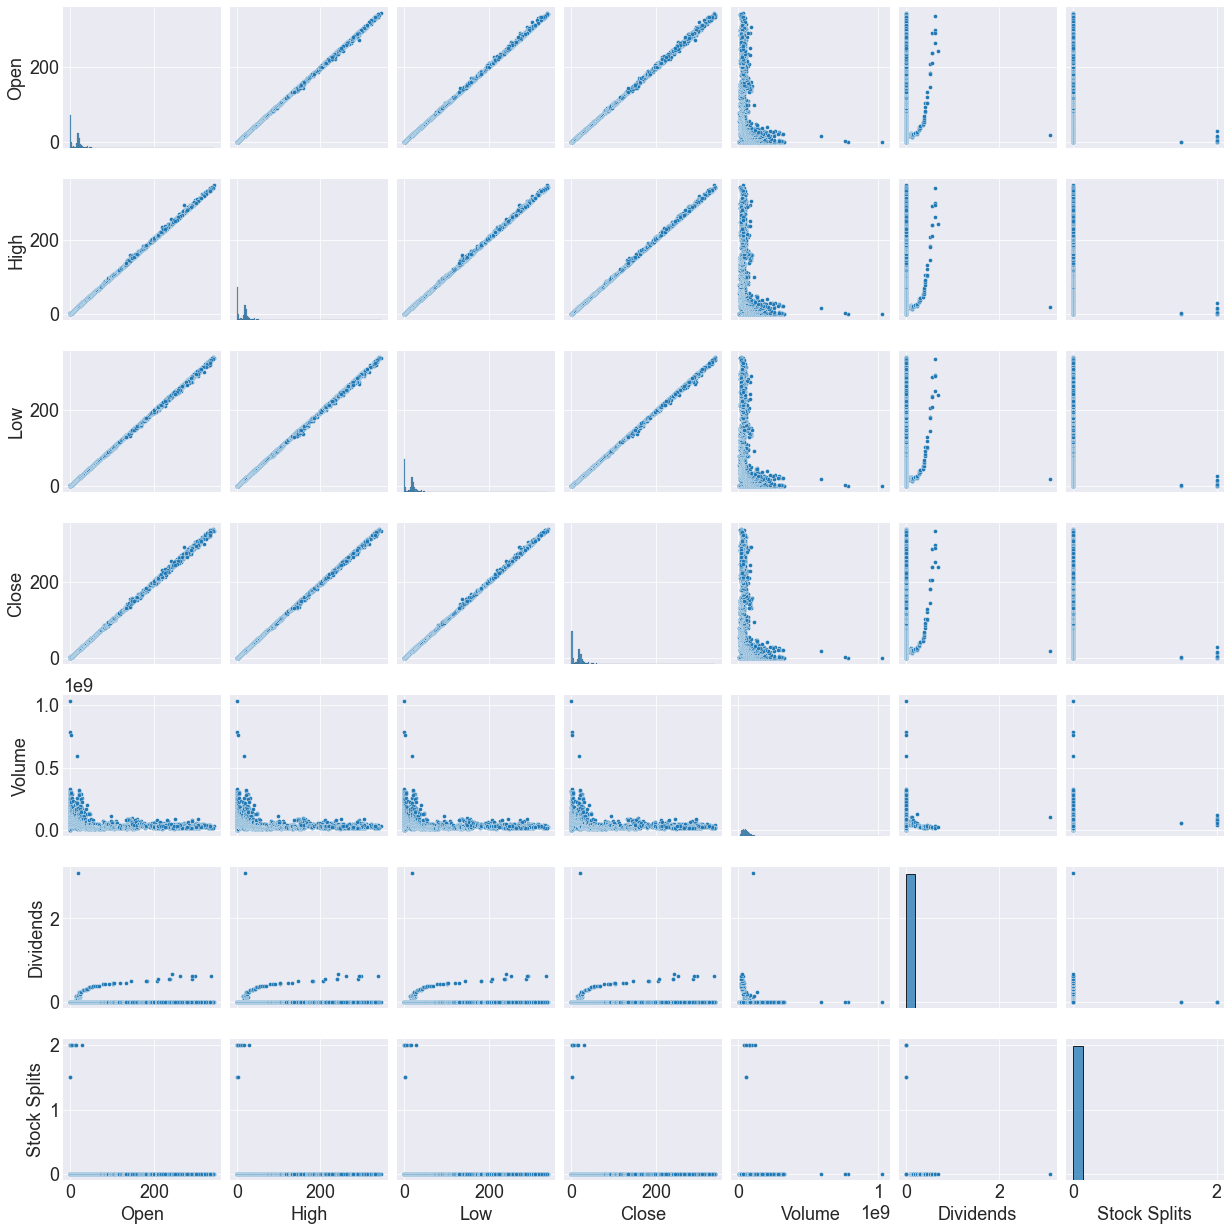

In [251]:
sns.pairplot(hist)
## KDE represents the data using a continuous probability density curve in one or more dimensions.

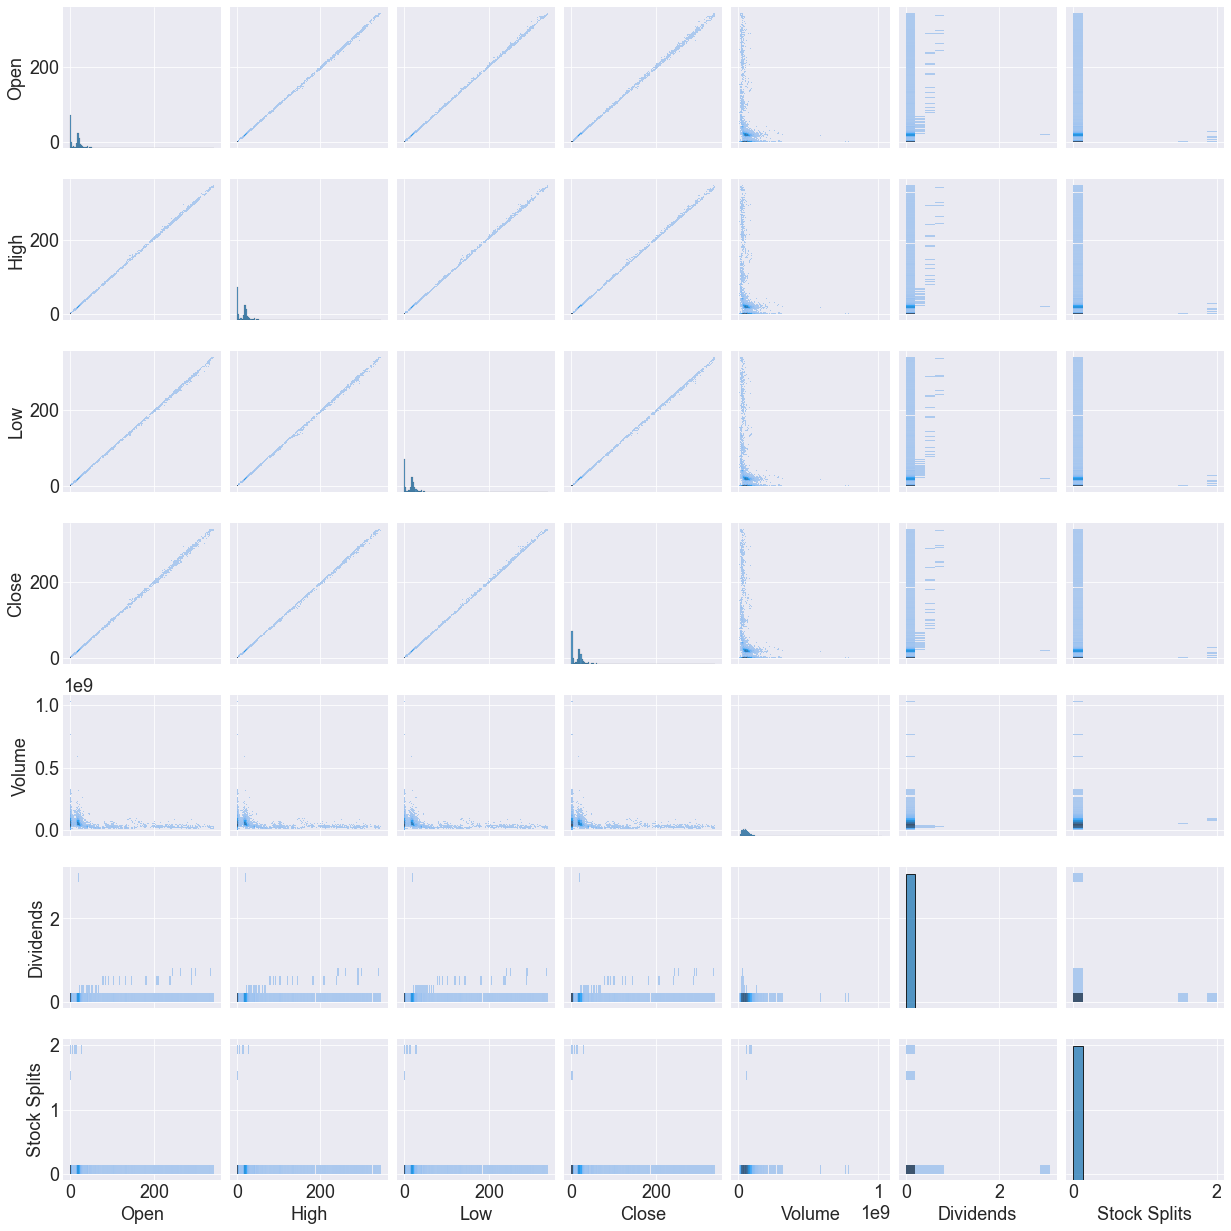

In [252]:
sns.pairplot(hist, kind= "hist")
# A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

In [253]:
hist1.isnull().sum()

Close          0
prediction    50
dtype: int64

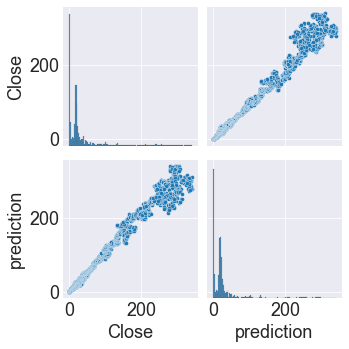

In [254]:
sns.pairplot(hist1)

<AxesSubplot:ylabel='Density'>

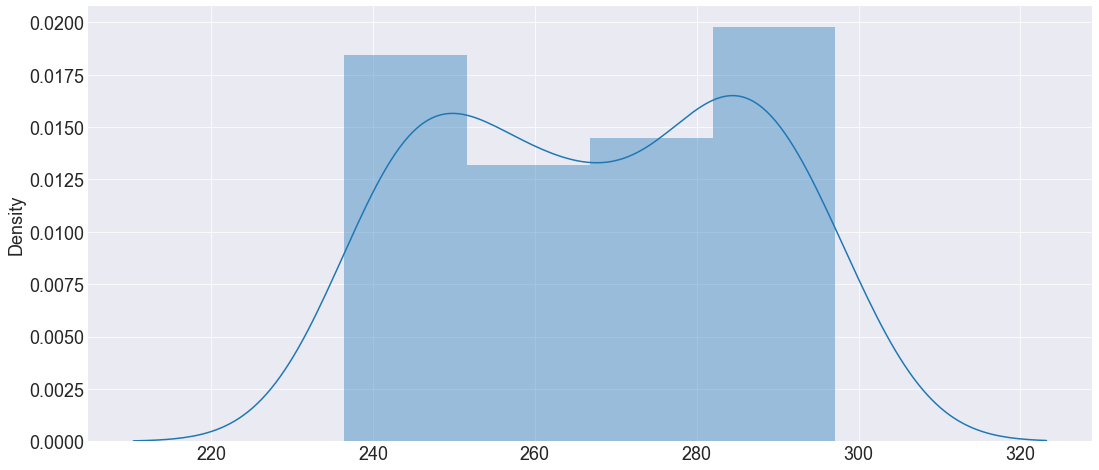

In [259]:
sns.distplot(linear_prediction)


<AxesSubplot:ylabel='Density'>

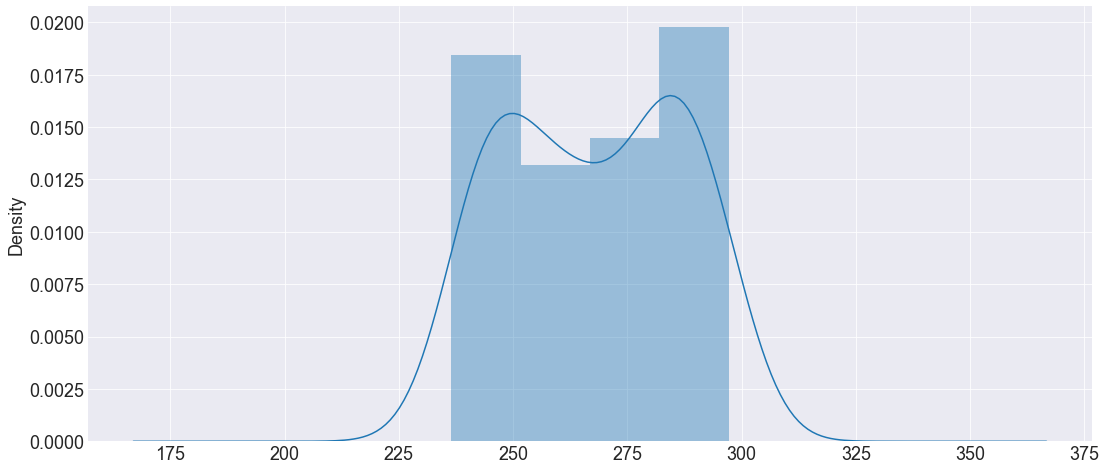

In [260]:
sns.distplot(linear_prediction,kde=True, kde_kws=dict(cut=8))
#distplot shows both a histogram (using density normalization) and a superimposed kernel density

<AxesSubplot:ylabel='Density'>

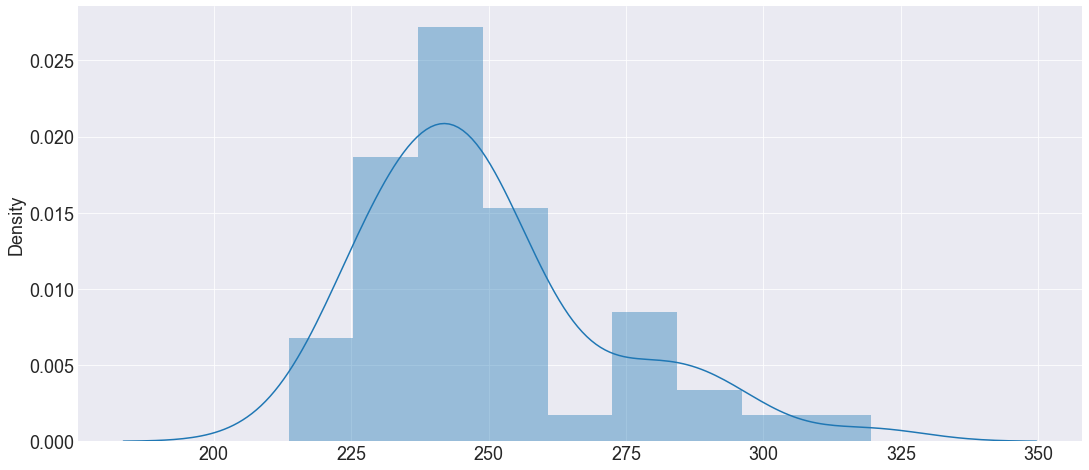

In [261]:
sns.distplot(tree_prediction)

<AxesSubplot:ylabel='Density'>

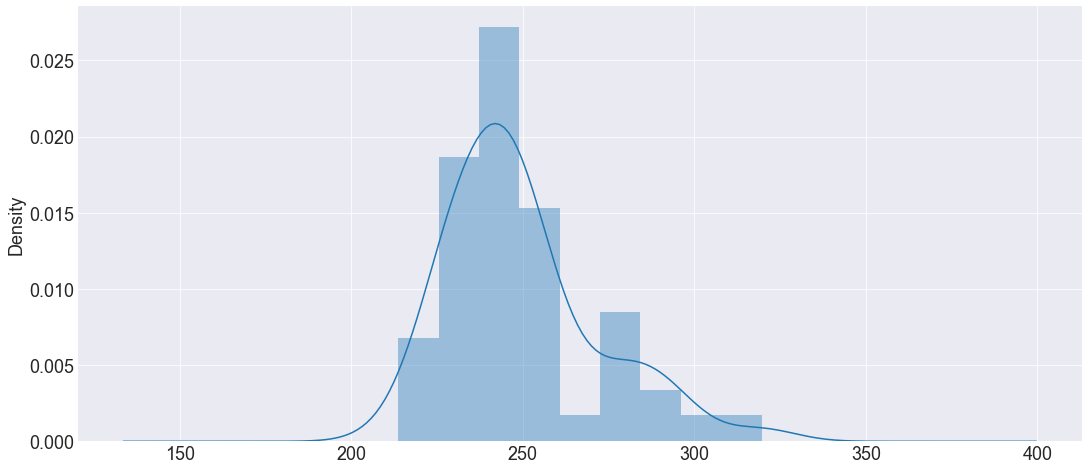

In [262]:
sns.distplot(tree_prediction,kde=True, kde_kws=dict(cut=8))


In [263]:
hist1.corr()


,Close,prediction
Close,1.00000,0.99311
prediction,0.99311,1.00000


<AxesSubplot:ylabel='Date'>

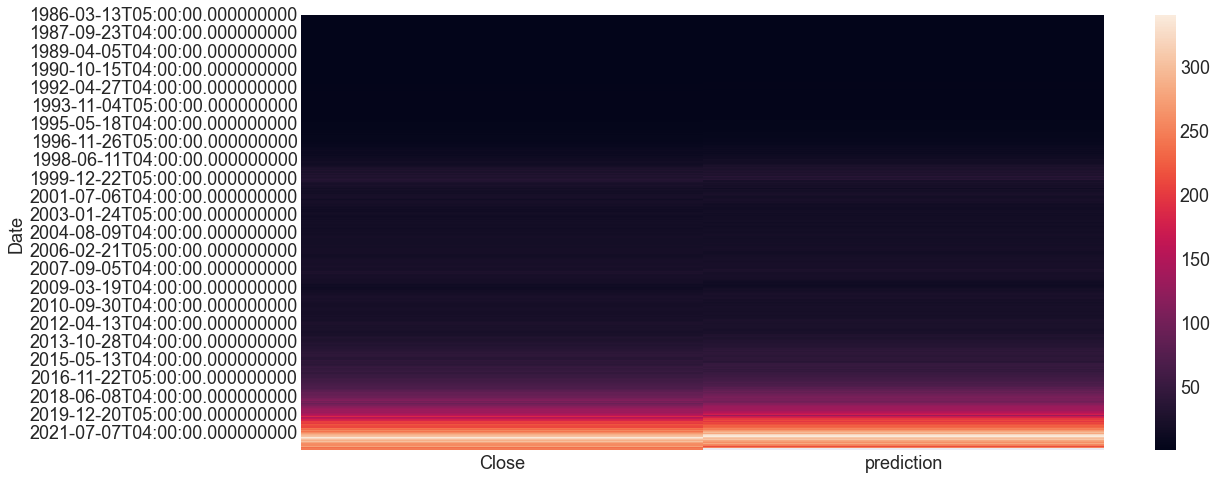

In [264]:
sns.heatmap(hist1)


<AxesSubplot:ylabel='Date'>

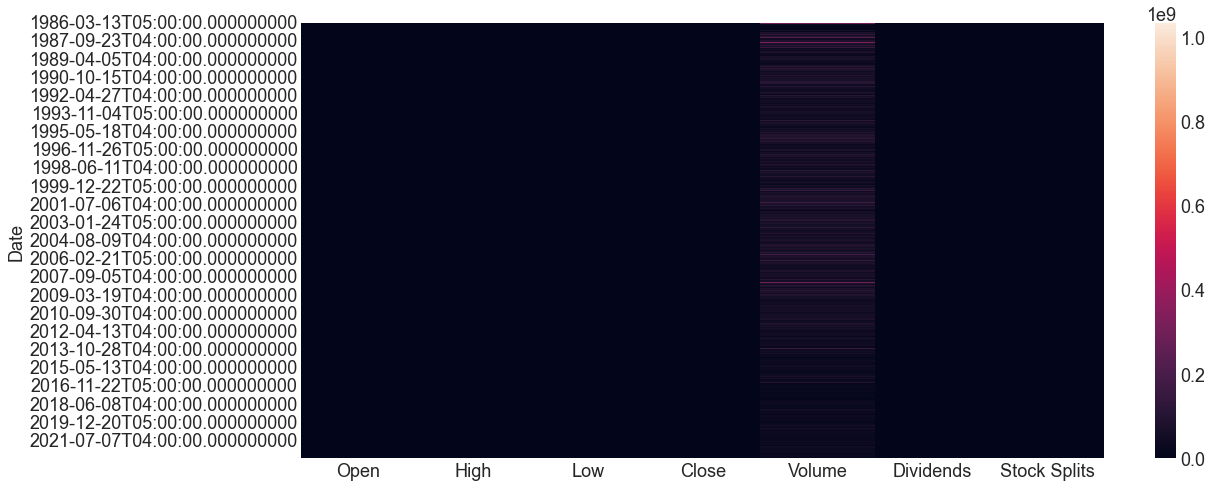

In [265]:
sns.heatmap(hist)

##  central machine learning concepts

In [266]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [267]:
reg = linear_model.LinearRegression()


In [268]:
reg.fit(x_train,y_train)


LinearRegression()

In [269]:
y_pred = reg.predict(x_test)


In [270]:
print('coefficient: \n', reg.coef_)


coefficient: 
 [1.01518252]


In [271]:
print('Mean squared Error: %2f' % mean_squared_error(y_test, y_pred))

Mean squared Error: 59.080351


In [272]:
print('Coefficient of determination: %.2f' % r2_score(x_test, y_pred))

Coefficient of determination: 1.00


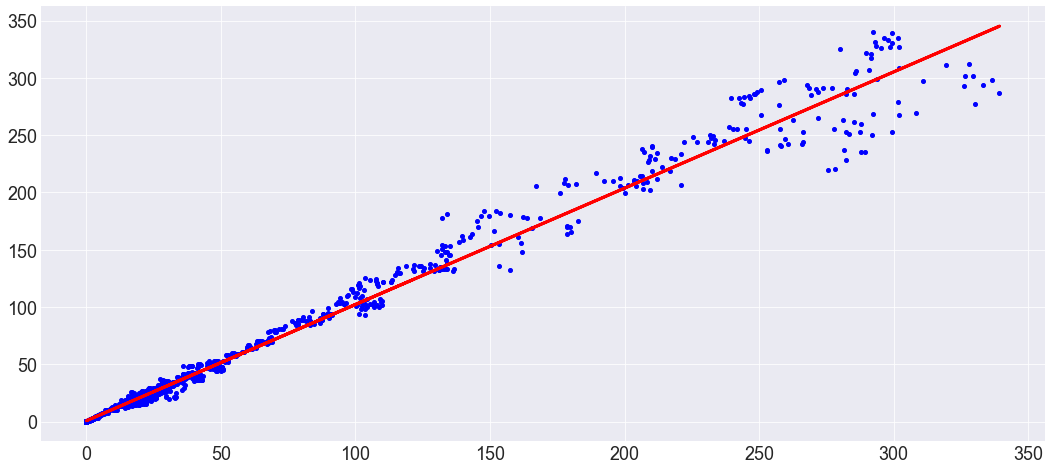

In [273]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=3)